<a href="https://colab.research.google.com/github/Swayamprakashpatel/IR_Tablet/blob/main/IR_Tablet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.',], axis = 1)


In [ ]:


# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2] # Binder Type and Disintegrant type
X2 = X.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10 # Disintegrant and binder amount
X3 = X.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100 # Mannitola and MCC amount
X4 = X.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20 # Punch Size
X5 = X.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10 # Compression Force
X6 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000 # Tablet Weight

y1 = df.iloc[:, 9:10].apply(pd.to_numeric, errors='coerce') / 20  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, 10:11].apply(pd.to_numeric, errors='coerce') / 10  # Output column 2 = % Friability
y3 = df.iloc[:, 11:12].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False)
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3,X4,X5,X6], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)

# Linear Regression for y1
linear_reg_y1 = LinearRegression()
linear_reg_y1.fit(X_train, y1_train)
y1_pred_linear = linear_reg_y1.predict(X_test)
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)

# Linear Regression for y2
linear_reg_y2 = LinearRegression()
linear_reg_y2.fit(X_train, y2_train)
y2_pred_linear = linear_reg_y2.predict(X_test)
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)

# Linear Regression for y3
linear_reg_y3 = LinearRegression()
linear_reg_y3.fit(X_train, y3_train)
y3_pred_linear = linear_reg_y3.predict(X_test)
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)

# Support Vector Machine (SVM) for y1
svm_y1 = SVR( )
svm_y1.fit(X_train, y1_train)
y1_pred_svm = svm_y1.predict(X_test)
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)

# Support Vector Machine (SVM) for y2
svm_y2 = SVR()
svm_y2.fit(X_train, y2_train)
y2_pred_svm = svm_y2.predict(X_test)
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)

# Support Vector Machine (SVM) for y3
svm_y3 = SVR()
svm_y3.fit(X_train, y3_train)
y3_pred_svm = svm_y3.predict(X_test)
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)

# k-Nearest Neighbors (k-NN) for y1
knn_y1 = KNeighborsRegressor()
knn_y1.fit(X_train, y1_train)
y1_pred_knn = knn_y1.predict(X_test)
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)

# k-Nearest Neighbors (k-NN) for y2
knn_y2 = KNeighborsRegressor()
knn_y2.fit(X_train, y2_train)
y2_pred_knn = knn_y2.predict(X_test)
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)

# k-Nearest Neighbors (k-NN) for y3
knn_y3 = KNeighborsRegressor()
knn_y3.fit(X_train, y3_train)
y3_pred_knn = knn_y3.predict(X_test)
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)

# Artificial Neural Network (ANN) for y1
from sklearn.metrics import r2_score

# Define custom R-squared metric
def r_squared(y_true, y_pred):
    return 1 - tf.reduce_sum(tf.square(y_true - y_pred)) / tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

# Define custom R-squared loss function
def r_squared_loss(y_true, y_pred):
    return -r_squared(y_true, y_pred)

# Define custom callback to monitor validation R-squared and save the best model
class R2Callback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, filepath, patience=10, delta=0.01):
        super(R2Callback, self).__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.filepath = filepath
        self.patience = patience
        self.delta = delta
        self.best_r2 = -float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        y_pred_val = self.model.predict(self.X_val)
        r2_val = r2_score(self.y_val, y_pred_val)
        print(f'Validation R^2: {r2_val}')
        if r2_val - self.best_r2 > self.delta:
            self.best_r2 = r2_val
            self.wait = 0
            self.model.save(self.filepath, overwrite=True)
            print("Model saved with validation R^2:", r2_val)
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Early stopping due to no improvement in validation R^2.")

# Define file paths to save the best models for y1, y2, and y3
filepath_y1 = '/content/drive/My Drive/y1.hdf5'
filepath_y2 = '/content/drive/My Drive/y2.hdf5'
filepath_y3 = '/content/drive/My Drive/y3.hdf5'

# Define custom callback to monitor validation R-squared for y1, y2, and y3
r2_callback_y1 = R2Callback(X_test, y1_test, filepath_y1, patience=369, delta=0.01)
r2_callback_y2 = R2Callback(X_test, y2_test, filepath_y2, patience=369, delta=0.01)
r2_callback_y3 = R2Callback(X_test, y3_test, filepath_y3, patience=369, delta=0.01)

# Define and compile ANN model for y1
ann_y1 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y1.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y1 with the custom callback
hist_y1 = ann_y1.fit(X_train, y1_train, epochs=1000, callbacks=[r2_callback_y1], validation_data=(X_test, y1_test), batch_size=None)

# Load the best model for y1
ann_y1 = tf.keras.models.load_model(filepath_y1, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y1
y1_pred_ann = ann_y1.predict(X_test)

# Define and compile ANN model for y2
ann_y2 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y2.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y2 with the custom callback
hist_y2 = ann_y2.fit(X_train, y2_train, epochs=1000, callbacks=[r2_callback_y2], validation_data=(X_test, y2_test), batch_size=None)

# Load the best model for y2
ann_y2 = tf.keras.models.load_model(filepath_y2, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y2
y2_pred_ann = ann_y2.predict(X_test)

# Define and compile ANN model for y3
ann_y3 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y3.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y3 with the custom callback
hist_y3 = ann_y3.fit(X_train, y3_train, epochs=1000, callbacks=[r2_callback_y3], validation_data=(X_test, y3_test), batch_size=None)

# Load the best model for y3
ann_y3 = tf.keras.models.load_model(filepath_y3, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y3
y3_pred_ann = ann_y3.predict(X_test)


from google.colab import files

# Replace 'file_path' with the path to the file you want to download
files.download('/content/drive/My Drive/y1.hdf5')
files.download('/content/drive/My Drive/y2.hdf5')
files.download('/content/drive/My Drive/y3.hdf5')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

Epoch 1/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: -0.03683425393471751
Model saved with validation R^2: -0.03683425393471751
17/17 [==============================] - 3s 70ms/step - loss: 2.2009 - r_squared: -2.1283 - val_loss: 0.0789 - val_r_squared: -0.0753
Epoch 2/1000
 5/17 [=======>......................] - ETA: 0s - loss: 1.5228 - r_squared: -1.5228

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.14649510917117858
17/17 [==============================] - 1s 32ms/step - loss: 1.5287 - r_squared: -1.4932 - val_loss: 0.1893 - val_r_squared: -0.1857
Epoch 3/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.020523732342523582
Model saved with validation R^2: -0.020523732342523582
17/17 [==============================] - 0s 24ms/step - loss: 1.1519 - r_squared: -1.2743 - val_loss: 0.0606 - val_r_squared: -0.0576
Epoch 4/1000
13/17 [=====================>........] - ETA: 0s - loss: 0.9662 - r_squared: -0.9662

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.06194054752102829
Model saved with validation R^2: 0.06194054752102829
17/17 [==============================] - 0s 22ms/step - loss: 0.9519 - r_squared: -0.9730 - val_loss: -0.0234 - val_r_squared: 0.0258
Epoch 5/1000
15/17 [=========================>....] - ETA: 0s - loss: 0.8603 - r_squared: -0.8603

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.03082305943454533
17/17 [==============================] - 0s 23ms/step - loss: 0.8458 - r_squared: -0.8264 - val_loss: 0.0708 - val_r_squared: -0.0680
Epoch 6/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.0681799972061854
17/17 [==============================] - 0s 24ms/step - loss: 0.7729 - r_squared: -0.7983 - val_loss: 0.1097 - val_r_squared: -0.1067
Epoch 7/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.007737009990754551
17/17 [==============================] - 0s 23ms/step - loss: 0.7853 - r_squared: -0.8321 - val_loss: 0.0476 - val_r_squared: -0.0447
Epoch 8/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.05334335241220245
17/17 [==============================] - 0s 24ms/step - loss: 0.8119 - r_squared: -0.8761 - val_loss: 0.0944 - val_r_squared: -0.0914
Epoch 9/1000
11/11 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.048000065559909544
17/17 [==============================] - 0s 24ms/step - loss: -0.4471 - r_squared: 0.4543 - val_loss: -0.0138 - val_r_squared: 0.0180
Epoch 334/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.010043573951939222
17/17 [==============================] - 0s 22ms/step - loss: -0.4349 - r_squared: 0.4369 - val_loss: 0.0257 - val_r_squared: -0.0213
Epoch 335/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.031382831562287605
17/17 [==============================] - 0s 20ms/step - loss: -0.4616 - r_squared: 0.4509 - val_loss: 0.0033 - val_r_squared: 0.0011
Epoch 336/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.007460955981631878
17/17 [==============================] - 0s 24ms/step - loss: -0.4548 - r_squared: 0.4639 - val_loss: 0.0441 - val_r_squared: -0.0396
Epoch 337/1000
11/11 [==============================] - 0s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.07362119585508964
17/17 [==============================] - 0s 26ms/step - loss: -0.5142 - r_squared: 0.5128 - val_loss: -0.0409 - val_r_squared: 0.0454
Epoch 369/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.10084247989041595
17/17 [==============================] - 0s 21ms/step - loss: -0.5117 - r_squared: 0.5217 - val_loss: -0.0691 - val_r_squared: 0.0734
Epoch 370/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.04330043381278881
17/17 [==============================] - 0s 21ms/step - loss: -0.4973 - r_squared: 0.4964 - val_loss: -0.0090 - val_r_squared: 0.0135
Epoch 371/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.06804302537996332
17/17 [==============================] - 0s 20ms/step - loss: -0.4928 - r_squared: 0.4879 - val_loss: -0.0347 - val_r_squared: 0.0391
Epoch 372/1000
11/11 [==============================] - 0s 3ms/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13546707889689558
17/17 [==============================] - 0s 22ms/step - loss: -0.4920 - r_squared: 0.4927 - val_loss: -0.1055 - val_r_squared: 0.1099
Epoch 388/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.10756210325502058
17/17 [==============================] - 0s 20ms/step - loss: -0.4906 - r_squared: 0.4733 - val_loss: -0.0768 - val_r_squared: 0.0813
Epoch 389/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20200958060255159
Model saved with validation R^2: 0.20200958060255159
17/17 [==============================] - 0s 24ms/step - loss: -0.5165 - r_squared: 0.5071 - val_loss: -0.1752 - val_r_squared: 0.1795
Epoch 390/1000
15/17 [=========================>....] - ETA: 0s - loss: -0.5004 - r_squared: 0.5004

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1807462790557256
17/17 [==============================] - 0s 22ms/step - loss: -0.5019 - r_squared: 0.4876 - val_loss: -0.1529 - val_r_squared: 0.1573
Epoch 391/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.17472935864533534
17/17 [==============================] - 0s 23ms/step - loss: -0.5222 - r_squared: 0.5075 - val_loss: -0.1465 - val_r_squared: 0.1510
Epoch 392/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1583837974458704
17/17 [==============================] - 0s 22ms/step - loss: -0.4953 - r_squared: 0.4985 - val_loss: -0.1293 - val_r_squared: 0.1338
Epoch 393/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14084585966813357
17/17 [==============================] - 0s 22ms/step - loss: -0.5259 - r_squared: 0.5172 - val_loss: -0.1108 - val_r_squared: 0.1154
Epoch 394/1000
11/11 [==============================] - 0s 3ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1835801233560297
17/17 [==============================] - 0s 21ms/step - loss: -0.5303 - r_squared: 0.5171 - val_loss: -0.1559 - val_r_squared: 0.1604
Epoch 397/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13824563701923365
17/17 [==============================] - 0s 22ms/step - loss: -0.5157 - r_squared: 0.4933 - val_loss: -0.1086 - val_r_squared: 0.1132
Epoch 398/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22159361551539458
17/17 [==============================] - 0s 23ms/step - loss: -0.5299 - r_squared: 0.5004 - val_loss: -0.1961 - val_r_squared: 0.2005
Epoch 399/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.0995776184123831
17/17 [==============================] - 0s 23ms/step - loss: -0.5274 - r_squared: 0.5394 - val_loss: -0.0689 - val_r_squared: 0.0735
Epoch 400/1000
11/11 [==============================] - 0s 3ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1769739070498858
17/17 [==============================] - 0s 23ms/step - loss: -0.5082 - r_squared: 0.4864 - val_loss: -0.1496 - val_r_squared: 0.1540
Epoch 406/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1897562715984531
17/17 [==============================] - 0s 23ms/step - loss: -0.5475 - r_squared: 0.5217 - val_loss: -0.1623 - val_r_squared: 0.1667
Epoch 407/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20376416273705544
17/17 [==============================] - 0s 23ms/step - loss: -0.5470 - r_squared: 0.5269 - val_loss: -0.1767 - val_r_squared: 0.1811
Epoch 408/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.22388862229882922
17/17 [==============================] - 0s 19ms/step - loss: -0.5466 - r_squared: 0.5384 - val_loss: -0.1978 - val_r_squared: 0.2023
Epoch 409/1000
11/11 [==============================] - 0s 3ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13436644977599121
17/17 [==============================] - 0s 24ms/step - loss: -0.4806 - r_squared: 0.4880 - val_loss: -0.1049 - val_r_squared: 0.1094
Epoch 427/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.100789989203101
17/17 [==============================] - 0s 24ms/step - loss: -0.5319 - r_squared: 0.4305 - val_loss: -0.0700 - val_r_squared: 0.0745
Epoch 428/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1659335503627708
17/17 [==============================] - 0s 19ms/step - loss: -0.4972 - r_squared: 0.4211 - val_loss: -0.1384 - val_r_squared: 0.1429
Epoch 429/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.21728866849175166
17/17 [==============================] - 0s 21ms/step - loss: -0.5300 - r_squared: 0.5223 - val_loss: -0.1917 - val_r_squared: 0.1961
Epoch 430/1000
11/11 [==============================] - 0s 3ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2152982459391496
17/17 [==============================] - 0s 24ms/step - loss: -0.5464 - r_squared: 0.5381 - val_loss: -0.1896 - val_r_squared: 0.1940
Epoch 438/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.23381196964972417
17/17 [==============================] - 0s 23ms/step - loss: -0.5492 - r_squared: 0.5540 - val_loss: -0.2090 - val_r_squared: 0.2134
Epoch 439/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.201266226589367
17/17 [==============================] - 0s 21ms/step - loss: -0.5401 - r_squared: 0.5217 - val_loss: -0.1753 - val_r_squared: 0.1799
Epoch 440/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14412357272428666
17/17 [==============================] - 0s 21ms/step - loss: -0.5314 - r_squared: 0.4406 - val_loss: -0.1158 - val_r_squared: 0.1205
Epoch 441/1000
11/11 [==============================] - 0s 3ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2733948970028458
17/17 [==============================] - 0s 21ms/step - loss: -0.5369 - r_squared: 0.5414 - val_loss: -0.2500 - val_r_squared: 0.2542
Epoch 464/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20433450146965282
17/17 [==============================] - 0s 23ms/step - loss: -0.6256 - r_squared: 0.6355 - val_loss: -0.1781 - val_r_squared: 0.1824
Epoch 465/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2985371144484926
17/17 [==============================] - 0s 21ms/step - loss: -0.5545 - r_squared: 0.5627 - val_loss: -0.2761 - val_r_squared: 0.2802
Epoch 466/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.30852208041059015
17/17 [==============================] - 0s 22ms/step - loss: -0.5603 - r_squared: 0.5684 - val_loss: -0.2864 - val_r_squared: 0.2905
Epoch 467/1000
11/11 [==============================] - 0s 4ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.26940812632818123
17/17 [==============================] - 0s 20ms/step - loss: -0.6110 - r_squared: 0.6242 - val_loss: -0.2461 - val_r_squared: 0.2503
Epoch 472/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.32406445297645237
17/17 [==============================] - 0s 24ms/step - loss: -0.5576 - r_squared: 0.5669 - val_loss: -0.3029 - val_r_squared: 0.3072
Epoch 473/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.21881567296705207
17/17 [==============================] - 0s 21ms/step - loss: -0.5761 - r_squared: 0.5700 - val_loss: -0.1931 - val_r_squared: 0.1976
Epoch 474/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.328223164556781
17/17 [==============================] - 0s 21ms/step - loss: -0.5965 - r_squared: 0.6046 - val_loss: -0.3073 - val_r_squared: 0.3115
Epoch 475/1000
11/11 [==============================] - 0s 3ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2864490701077469
17/17 [==============================] - 0s 22ms/step - loss: -0.5993 - r_squared: 0.5962 - val_loss: -0.2639 - val_r_squared: 0.2682
Epoch 487/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2845931525111346
17/17 [==============================] - 0s 24ms/step - loss: -0.5738 - r_squared: 0.5719 - val_loss: -0.2620 - val_r_squared: 0.2663
Epoch 488/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2687193006100421
17/17 [==============================] - 0s 22ms/step - loss: -0.6037 - r_squared: 0.6164 - val_loss: -0.2453 - val_r_squared: 0.2497
Epoch 489/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.30652078905796054
17/17 [==============================] - 0s 21ms/step - loss: -0.5986 - r_squared: 0.6041 - val_loss: -0.2843 - val_r_squared: 0.2887
Epoch 490/1000
11/11 [==============================] - 0s 4ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3554665688032538
17/17 [==============================] - 0s 20ms/step - loss: -0.5956 - r_squared: 0.5801 - val_loss: -0.3353 - val_r_squared: 0.3393
Epoch 495/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4185608340612895
Model saved with validation R^2: 0.4185608340612895
17/17 [==============================] - 0s 27ms/step - loss: -0.5919 - r_squared: 0.5612 - val_loss: -0.4006 - val_r_squared: 0.4045
Epoch 496/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.6149 - r_squared: 0.6149

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.357885175368186
17/17 [==============================] - 0s 23ms/step - loss: -0.6423 - r_squared: 0.6212 - val_loss: -0.3378 - val_r_squared: 0.3418
Epoch 497/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3301014538764425
17/17 [==============================] - 0s 23ms/step - loss: -0.6148 - r_squared: 0.6078 - val_loss: -0.3089 - val_r_squared: 0.3130
Epoch 498/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3709027973675064
17/17 [==============================] - 0s 24ms/step - loss: -0.6154 - r_squared: 0.6133 - val_loss: -0.3517 - val_r_squared: 0.3558
Epoch 499/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4033037506379552
17/17 [==============================] - 0s 20ms/step - loss: -0.6041 - r_squared: 0.5823 - val_loss: -0.3848 - val_r_squared: 0.3888
Epoch 500/1000
11/11 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.42448142917006026
17/17 [==============================] - 0s 23ms/step - loss: -0.5739 - r_squared: 0.4614 - val_loss: -0.4076 - val_r_squared: 0.4115
Epoch 505/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4073100086037078
17/17 [==============================] - 0s 22ms/step - loss: -0.6053 - r_squared: 0.5791 - val_loss: -0.3895 - val_r_squared: 0.3934
Epoch 506/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.35418009567094977
17/17 [==============================] - 0s 22ms/step - loss: -0.5622 - r_squared: 0.5708 - val_loss: -0.3345 - val_r_squared: 0.3386
Epoch 507/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4012865824265013
17/17 [==============================] - 0s 20ms/step - loss: -0.5529 - r_squared: 0.5227 - val_loss: -0.3831 - val_r_squared: 0.3870
Epoch 508/1000
11/11 [==============================] - 0s 3ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4383957217174813
17/17 [==============================] - 0s 24ms/step - loss: -0.6625 - r_squared: 0.6634 - val_loss: -0.4215 - val_r_squared: 0.4255
Epoch 551/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4127590526069299
17/17 [==============================] - 0s 23ms/step - loss: -0.6334 - r_squared: 0.6296 - val_loss: -0.3950 - val_r_squared: 0.3990
Epoch 552/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4427668225124186
17/17 [==============================] - 0s 21ms/step - loss: -0.6291 - r_squared: 0.6204 - val_loss: -0.4263 - val_r_squared: 0.4302
Epoch 553/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.46595076560655224
17/17 [==============================] - 0s 24ms/step - loss: -0.6111 - r_squared: 0.6229 - val_loss: -0.4502 - val_r_squared: 0.4541
Epoch 554/1000
11/11 [==============================] - 0s 2ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4141987290481983
17/17 [==============================] - 0s 24ms/step - loss: -0.6043 - r_squared: 0.5874 - val_loss: -0.3955 - val_r_squared: 0.3997
Epoch 565/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4521057175070694
17/17 [==============================] - 0s 19ms/step - loss: -0.6500 - r_squared: 0.6587 - val_loss: -0.4346 - val_r_squared: 0.4387
Epoch 566/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.46034001979263095
17/17 [==============================] - 0s 22ms/step - loss: -0.6376 - r_squared: 0.6511 - val_loss: -0.4436 - val_r_squared: 0.4476
Epoch 567/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.450759347533529
17/17 [==============================] - 0s 21ms/step - loss: -0.6195 - r_squared: 0.6331 - val_loss: -0.4339 - val_r_squared: 0.4380
Epoch 568/1000
11/11 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4918380953801941
17/17 [==============================] - 0s 23ms/step - loss: -0.6608 - r_squared: 0.6750 - val_loss: -0.4766 - val_r_squared: 0.4809
Epoch 586/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5208294863959064
17/17 [==============================] - 0s 23ms/step - loss: -0.6859 - r_squared: 0.6792 - val_loss: -0.5063 - val_r_squared: 0.5104
Epoch 587/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5427925636203014
Model saved with validation R^2: 0.5427925636203014
17/17 [==============================] - 0s 23ms/step - loss: -0.6809 - r_squared: 0.6555 - val_loss: -0.5288 - val_r_squared: 0.5329
Epoch 588/1000
12/17 [====================>.........] - ETA: 0s - loss: -0.6345 - r_squared: 0.6345

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.48349162727762485
17/17 [==============================] - 0s 22ms/step - loss: -0.6338 - r_squared: 0.6223 - val_loss: -0.4685 - val_r_squared: 0.4727
Epoch 589/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4902559841653792
17/17 [==============================] - 0s 19ms/step - loss: -0.6576 - r_squared: 0.6460 - val_loss: -0.4756 - val_r_squared: 0.4798
Epoch 590/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4860576777661211
17/17 [==============================] - 0s 25ms/step - loss: -0.6654 - r_squared: 0.6724 - val_loss: -0.4714 - val_r_squared: 0.4756
Epoch 591/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4953270914311413
17/17 [==============================] - 0s 24ms/step - loss: -0.6673 - r_squared: 0.6705 - val_loss: -0.4805 - val_r_squared: 0.4846
Epoch 592/1000
11/11 [==============================] - 0s 3ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5757448576784913
Model saved with validation R^2: 0.5757448576784913
17/17 [==============================] - 1s 37ms/step - loss: -0.6897 - r_squared: 0.6697 - val_loss: -0.5632 - val_r_squared: 0.5670
Epoch 639/1000
 7/17 [===========>..................] - ETA: 0s - loss: -0.6502 - r_squared: 0.6502

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5501208663662684
17/17 [==============================] - 1s 31ms/step - loss: -0.6704 - r_squared: 0.6772 - val_loss: -0.5368 - val_r_squared: 0.5407
Epoch 640/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.547522808554469
17/17 [==============================] - 1s 32ms/step - loss: -0.6780 - r_squared: 0.6604 - val_loss: -0.5343 - val_r_squared: 0.5382
Epoch 641/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5351328942032599
17/17 [==============================] - 1s 31ms/step - loss: -0.6759 - r_squared: 0.6879 - val_loss: -0.5217 - val_r_squared: 0.5256
Epoch 642/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5351409270198046
17/17 [==============================] - 1s 35ms/step - loss: -0.7006 - r_squared: 0.7023 - val_loss: -0.5214 - val_r_squared: 0.5253
Epoch 643/1000
11/11 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.594352699634747
17/17 [==============================] - 0s 23ms/step - loss: -0.6887 - r_squared: 0.6683 - val_loss: -0.5831 - val_r_squared: 0.5868
Epoch 665/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5955669637100074
17/17 [==============================] - 0s 20ms/step - loss: -0.7086 - r_squared: 0.7116 - val_loss: -0.5841 - val_r_squared: 0.5879
Epoch 666/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5903561768720843
17/17 [==============================] - 0s 23ms/step - loss: -0.7132 - r_squared: 0.7231 - val_loss: -0.5789 - val_r_squared: 0.5826
Epoch 667/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5593705855738065
17/17 [==============================] - 0s 21ms/step - loss: -0.6648 - r_squared: 0.6745 - val_loss: -0.5470 - val_r_squared: 0.5509
Epoch 668/1000
11/11 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5586312329570562
17/17 [==============================] - 0s 23ms/step - loss: -0.7058 - r_squared: 0.7097 - val_loss: -0.5462 - val_r_squared: 0.5500
Epoch 682/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5856223061145344
17/17 [==============================] - 0s 22ms/step - loss: -0.7462 - r_squared: 0.7453 - val_loss: -0.5736 - val_r_squared: 0.5773
Epoch 683/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5867712900559723
17/17 [==============================] - 0s 22ms/step - loss: -0.7176 - r_squared: 0.7209 - val_loss: -0.5748 - val_r_squared: 0.5785
Epoch 684/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6044450536357402
17/17 [==============================] - 0s 25ms/step - loss: -0.7318 - r_squared: 0.7347 - val_loss: -0.5933 - val_r_squared: 0.5969
Epoch 685/1000
11/11 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6502237879632788
17/17 [==============================] - 0s 19ms/step - loss: -0.7812 - r_squared: 0.7665 - val_loss: -0.6398 - val_r_squared: 0.6431
Epoch 751/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6116543525700493
17/17 [==============================] - 0s 22ms/step - loss: -0.7335 - r_squared: 0.7150 - val_loss: -0.6005 - val_r_squared: 0.6039
Epoch 752/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6293555638286585
17/17 [==============================] - 0s 23ms/step - loss: -0.7669 - r_squared: 0.7453 - val_loss: -0.6186 - val_r_squared: 0.6219
Epoch 753/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6238005809855034
17/17 [==============================] - 0s 18ms/step - loss: -0.7890 - r_squared: 0.7899 - val_loss: -0.6127 - val_r_squared: 0.6160
Epoch 754/1000
11/11 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6518844273762805
17/17 [==============================] - 0s 20ms/step - loss: -0.7341 - r_squared: 0.7282 - val_loss: -0.6411 - val_r_squared: 0.6443
Epoch 763/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6506856857502549
17/17 [==============================] - 0s 22ms/step - loss: -0.7675 - r_squared: 0.7631 - val_loss: -0.6399 - val_r_squared: 0.6431
Epoch 764/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6526450632714574
17/17 [==============================] - 0s 27ms/step - loss: -0.7764 - r_squared: 0.7779 - val_loss: -0.6420 - val_r_squared: 0.6453
Epoch 765/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6555701619244804
17/17 [==============================] - 1s 32ms/step - loss: -0.7814 - r_squared: 0.7894 - val_loss: -0.6449 - val_r_squared: 0.6481
Epoch 766/1000
11/11 [==============================] - 0s 3ms/step

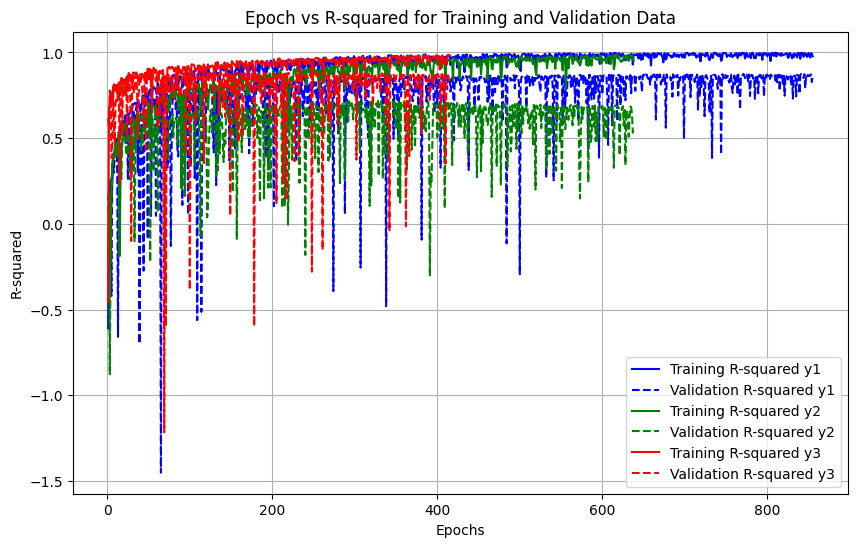

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Extract R-squared values from the training history
def extract_r_squared(history):
    train_r2 = history.history['r_squared']
    val_r2 = history.history['val_r_squared']
    epochs = np.arange(1, len(train_r2) + 1)  # Correct epochs array
    return epochs, train_r2, val_r2

# Extract R-squared values for y1, y2, and y3
epochs_y1, train_r2_y1, val_r2_y1 = extract_r_squared(hist_y1)
epochs_y2, train_r2_y2, val_r2_y2 = extract_r_squared(hist_y2)
epochs_y3, train_r2_y3, val_r2_y3 = extract_r_squared(hist_y3)

# Plot R-squared values for training and validation data
plt.figure(figsize=(10, 6))

# Plot y1 R-squared values
plt.plot(epochs_y1, train_r2_y1, label='Training R-squared y1', color='blue')
plt.plot(epochs_y1, val_r2_y1, label='Validation R-squared y1', color='blue', linestyle='--')

# Plot y2 R-squared values
plt.plot(epochs_y2, train_r2_y2, label='Training R-squared y2', color='green')
plt.plot(epochs_y2, val_r2_y2, label='Validation R-squared y2', color='green', linestyle='--')

# Plot y3 R-squared values
plt.plot(epochs_y3, train_r2_y3, label='Training R-squared y3', color='red')
plt.plot(epochs_y3, val_r2_y3, label='Validation R-squared y3', color='red', linestyle='--')

# Adding labels and legend
plt.xlabel('Epochs')
plt.ylabel('R-squared')
plt.title('Epoch vs R-squared for Training and Validation Data')
plt.legend()
plt.grid(True)

# Save the plot as a .tiff file with 600 dpi
plt.savefig('/content/epoch_vs_r_squared.png', format='png', dpi=100)

# Show the plot
plt.show()


In [ ]:

files.download('/content/Actual_vs_Predicted_y1.tiff')
files.download('/content/Actual_vs_Predicted_y1_ANN.tiff')
files.download('/content/Actual_vs_Predicted_y1_LinearRegression.tiff')
files.download('/content/Actual_vs_Predicted_y1_SVM.tiff')
files.download('/content/Actual_vs_Predicted_y1_all_Data.tiff')
files.download('/content/Actual_vs_Predicted_y1_kNN.tiff')


files.download('/content/Actual_vs_Predicted_y2.tiff')
files.download('/content/Actual_vs_Predicted_y2_ANN.tiff')
files.download('/content/Actual_vs_Predicted_y2_LinearRegression.tiff')
files.download('/content/Actual_vs_Predicted_y2_SVM.tiff')
files.download('/content/Actual_vs_Predicted_y2_all_Data.tiff')
files.download('/content/Actual_vs_Predicted_y2_kNN.tiff')

files.download('/content/Actual_vs_Predicted_y3.tiff')
files.download('/content/Actual_vs_Predicted_y3_ANN.tiff')
files.download('/content/Actual_vs_Predicted_y3_LinearRegression.tiff')
files.download('/content/Actual_vs_Predicted_y3_SVM.tiff')
files.download('/content/Actual_vs_Predicted_y3_all_Data.tiff')
files.download('/content/Actual_vs_Predicted_y3_kNN.tiff')

files.download('/content/MSE_Comparison.tiff')

files.download('/content/Residuals_y1_Histogram.tiff')
files.download('/content/Residuals_y2_Histogram.tiff')
files.download('/content/Residuals_y3_Histogram.tiff')

files.download('/content/Combined_Feature_Importances_Artificial Neural Network.tiff')
files.download('/content/Combined_Feature_Importances_Linear Regression.tiff')
files.download('/content/Combined_Feature_Importances_Support Vector Machine.tiff')
files.download('/content/Combined_Feature_Importances_k-Nearest Neighbors.tiff')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have already defined y1_test, y2_test, y3_test, y1_pred_linear, y2_pred_linear, y3_pred_linear,
# y1_pred_svm, y2_pred_svm, y3_pred_svm, y1_pred_knn, y2_pred_knn, y3_pred_knn, y1_pred_ann, y2_pred_ann, y3_pred_ann

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1_test, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2_test, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3_test, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

# Create a bar plot of MSE values for each model
models = ['Linear Regression', 'SVM', 'k-NN', 'ANN']
mse_values_y1 = [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1]
mse_values_y2 = [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2]
mse_values_y3 = [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3]

# Set width of bar
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create grouped bar plot for MSE values for each model for y1, y2, and y3
plt.figure(figsize=(10, 6))
plt.bar(r1, mse_values_y1, color='b', width=bar_width, edgecolor='grey', label='y1')
plt.bar(r2, mse_values_y2, color='g', width=bar_width, edgecolor='grey', label='y2')
plt.bar(r3, mse_values_y3, color='orange', width=bar_width, edgecolor='grey', label='y3')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add ylabel
plt.ylabel('MSE', fontweight='bold')

# Add title
plt.title('MSE Comparison for Different Models')
plt.legend()
plt.savefig('MSE_Comparison.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y1
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_pred_linear, label='Linear Regression')
plt.scatter(y1_test, y1_pred_svm, label='SVM')
plt.scatter(y1_test, y1_pred_knn, label='k-NN')
plt.scatter(y1_test, y1_pred_ann, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.savefig('Actual_vs_Predicted_y1.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y1
residuals_y1 = y1_test - y1_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y1, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y1 (Linear Regression)')
plt.savefig('Residuals_y1_Histogram.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y2
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred_linear, label='Linear Regression')
plt.scatter(y2_test, y2_pred_svm, label='SVM')
plt.scatter(y2_test, y2_pred_knn, label='k-NN')
plt.scatter(y2_test, y2_pred_ann, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.savefig('Actual_vs_Predicted_y2.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y2
residuals_y2 = y2_test - y2_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y2, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y2 (Linear Regression)')
plt.savefig('Residuals_y2_Histogram.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3_test, y3_pred_linear, label='Linear Regression')
plt.scatter(y3_test, y3_pred_svm, label='SVM')
plt.scatter(y3_test, y3_pred_knn, label='k-NN')
plt.scatter(y3_test, y3_pred_ann, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.savefig('Actual_vs_Predicted_y3.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y3
residuals_y3 = y3_test - y3_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y3, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y3 (Linear Regression)')
plt.savefig('Residuals_y3_Histogram.tiff', dpi=600, format='tiff')
plt.show()


In [ ]:
y1_pred_ann_all = ann_y1.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y1, y1_pred_ann_all, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.savefig('Actual_vs_Predicted_y1_all_Data.tiff', dpi=600, format='tiff')
plt.show()


y2_pred_ann_all = ann_y2.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y2, y2_pred_ann_all, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.savefig('Actual_vs_Predicted_y2_all_Data.tiff', dpi=600, format='tiff')
plt.show()

y3_pred_ann_all = ann_y3.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3, y3_pred_ann_all, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.savefig('Actual_vs_Predicted_y3_all_Data.tiff', dpi=600, format='tiff')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have already defined y1_test, y2_test, y3_test, y1_pred_linear, y2_pred_linear, y3_pred_linear,
# y1_pred_svm, y2_pred_svm, y3_pred_svm, y1_pred_knn, y2_pred_knn, y3_pred_knn, y1_pred_ann, y2_pred_ann, y3_pred_ann

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1_test, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2_test, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3_test, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

# Function to create and save scatter plots
def create_and_save_scatter_plot(actual, predicted, model_name, y_label, file_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted)
    plt.xlabel('Actual ' + y_label)
    plt.ylabel('Predicted ' + y_label)
    plt.title(f'Actual vs Predicted {y_label} - {model_name}')
    plt.savefig(file_name, dpi=600, format='tiff')
    plt.close()

# Create scatter plots for y1
create_and_save_scatter_plot(y1_test, y1_pred_linear, 'Linear Regression', 'y1', 'Actual_vs_Predicted_y1_LinearRegression.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_svm, 'SVM', 'y1', 'Actual_vs_Predicted_y1_SVM.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_knn, 'k-NN', 'y1', 'Actual_vs_Predicted_y1_kNN.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_ann, 'ANN', 'y1', 'Actual_vs_Predicted_y1_ANN.tiff')

# Create scatter plots for y2
create_and_save_scatter_plot(y2_test, y2_pred_linear, 'Linear Regression', 'y2', 'Actual_vs_Predicted_y2_LinearRegression.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_svm, 'SVM', 'y2', 'Actual_vs_Predicted_y2_SVM.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_knn, 'k-NN', 'y2', 'Actual_vs_Predicted_y2_kNN.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_ann, 'ANN', 'y2', 'Actual_vs_Predicted_y2_ANN.tiff')

# Create scatter plots for y3
create_and_save_scatter_plot(y3_test, y3_pred_linear, 'Linear Regression', 'y3', 'Actual_vs_Predicted_y3_LinearRegression.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_svm, 'SVM', 'y3', 'Actual_vs_Predicted_y3_SVM.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_knn, 'k-NN', 'y3', 'Actual_vs_Predicted_y3_kNN.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_ann, 'ANN', 'y3', 'Actual_vs_Predicted_y3_ANN.tiff')


In [ ]:
from sklearn.metrics import r2_score

r2_y1_ann_all = r2_score(y1, y1_pred_ann_all)
r2_y2_ann_all = r2_score(y2, y2_pred_ann_all)
r2_y3_ann_all = r2_score(y3, y3_pred_ann_all)
print('R_Square_y1 =', r2_y1_ann_all)
print('R_Square_y2 =', r2_y2_ann_all)
print('R_Square_y3 =', r2_y3_ann_all)

r2_y1_linear_all = r2_score(y1, y1_pred_linear_all)
r2_y2_ann_all = r2_score(y2, y2_pred_ann_all)
r2_y3_ann_all = r2_score(y3, y3_pred_ann_all)

In [7]:
from sklearn.metrics import r2_score

# Calculate R-squared for Linear Regression model
linear_r2_y1 = r2_score(y1_test, y1_pred_linear)
linear_r2_y2 = r2_score(y2_test, y2_pred_linear)
linear_r2_y3 = r2_score(y3_test, y3_pred_linear)


print("Linear Regression R-squared for y1:", linear_r2_y1)
print("Linear Regression R-squared for y2:", linear_r2_y2)
print("Linear Regression R-squared for y3:", linear_r2_y3)

# Calculate R-squared for Support Vector Machine (SVM) model
svm_r2_y1 = r2_score(y1_test, y1_pred_svm)
svm_r2_y2 = r2_score(y2_test, y2_pred_svm)
svm_r2_y3 = r2_score(y3_test, y3_pred_svm)

print("SVM R-squared for y1:", svm_r2_y1)
print("SVM R-squared for y2:", svm_r2_y2)
print("SVM R-squared for y3:", svm_r2_y3)

# Calculate R-squared for k-Nearest Neighbors (k-NN) model
knn_r2_y1 = r2_score(y1_test, y1_pred_knn)
knn_r2_y2 = r2_score(y2_test, y2_pred_knn)
knn_r2_y3 = r2_score(y3_test, y3_pred_knn)

print("k-NN R-squared for y1:", knn_r2_y1)
print("k-NN R-squared for y2:", knn_r2_y2)
print("k-NN R-squared for y3:", knn_r2_y3)

# Calculate R-squared for Artificial Neural Network (ANN) model
ann_r2_y1 = r2_score(y1_test, y1_pred_ann)
ann_r2_y2 = r2_score(y2_test, y2_pred_ann)
ann_r2_y3 = r2_score(y3_test, y3_pred_ann)

print("ANN R-squared for y1:", ann_r2_y1)
print("ANN R-squared for y2:", ann_r2_y2)
print("ANN R-squared for y3:", ann_r2_y3)


Linear Regression R-squared for y1: 0.623975469458788
Linear Regression R-squared for y2: 0.4628319785612317
Linear Regression R-squared for y3: 0.7839374382928582
SVM R-squared for y1: 0.7003039076994468
SVM R-squared for y2: 0.4759927200684906
SVM R-squared for y3: 0.6600727194479972
k-NN R-squared for y1: 0.14740191821238302
k-NN R-squared for y2: 0.27845386911920667
k-NN R-squared for y3: 0.7835200998189398
ANN R-squared for y1: 0.876178174233464
ANN R-squared for y2: 0.722884154666686
ANN R-squared for y3: 0.8859303583825404


In [8]:
from sklearn.metrics import r2_score

# Predict using the full dataset
y1_pred_linear_full = linear_reg_y1.predict(X_encoded)
y2_pred_linear_full = linear_reg_y2.predict(X_encoded)
y3_pred_linear_full = linear_reg_y3.predict(X_encoded)

y1_pred_svm_full = svm_y1.predict(X_encoded)
y2_pred_svm_full = svm_y2.predict(X_encoded)
y3_pred_svm_full = svm_y3.predict(X_encoded)

y1_pred_knn_full = knn_y1.predict(X_encoded)
y2_pred_knn_full = knn_y2.predict(X_encoded)
y3_pred_knn_full = knn_y3.predict(X_encoded)

y1_pred_ann_full = ann_y1.predict(X_encoded).ravel()
y2_pred_ann_full = ann_y2.predict(X_encoded).ravel()
y3_pred_ann_full = ann_y3.predict(X_encoded).ravel()

# Calculate R-squared for Linear Regression model
linear_r2_y1 = r2_score(y1, y1_pred_linear_full)
linear_r2_y2 = r2_score(y2, y2_pred_linear_full)
linear_r2_y3 = r2_score(y3, y3_pred_linear_full)

print("Linear Regression R-squared for y1:", linear_r2_y1)
print("Linear Regression R-squared for y2:", linear_r2_y2)
print("Linear Regression R-squared for y3:", linear_r2_y3)

# Calculate R-squared for Support Vector Machine (SVM) model
svm_r2_y1 = r2_score(y1, y1_pred_svm_full)
svm_r2_y2 = r2_score(y2, y2_pred_svm_full)
svm_r2_y3 = r2_score(y3, y3_pred_svm_full)

print("SVM R-squared for y1:", svm_r2_y1)
print("SVM R-squared for y2:", svm_r2_y2)
print("SVM R-squared for y3:", svm_r2_y3)

# Calculate R-squared for k-Nearest Neighbors (k-NN) model
knn_r2_y1 = r2_score(y1, y1_pred_knn_full)
knn_r2_y2 = r2_score(y2, y2_pred_knn_full)
knn_r2_y3 = r2_score(y3, y3_pred_knn_full)

print("k-NN R-squared for y1:", knn_r2_y1)
print("k-NN R-squared for y2:", knn_r2_y2)
print("k-NN R-squared for y3:", knn_r2_y3)

# Calculate R-squared for Artificial Neural Network (ANN) model
ann_r2_y1 = r2_score(y1, y1_pred_ann_full)
ann_r2_y2 = r2_score(y2, y2_pred_ann_full)
ann_r2_y3 = r2_score(y3, y3_pred_ann_full)

print("ANN R-squared for y1:", ann_r2_y1)
print("ANN R-squared for y2:", ann_r2_y2)
print("ANN R-squared for y3:", ann_r2_y3)


27/27 [==============================] - 0s 3ms/step
Linear Regression R-squared for y1: 0.6507652658772729
Linear Regression R-squared for y2: 0.45664042244510905
Linear Regression R-squared for y3: 0.7704853887334145
SVM R-squared for y1: 0.7236851733731695
SVM R-squared for y2: 0.5087797484136991
SVM R-squared for y3: 0.6467232410780166
k-NN R-squared for y1: 0.31467720645126707
k-NN R-squared for y2: 0.4030875712184484
k-NN R-squared for y3: 0.821157752136113
ANN R-squared for y1: 0.9472855169464471
ANN R-squared for y2: 0.8393890200556187
ANN R-squared for y3: 0.9018023590748183


**FIND IMPORTANCE OF INDEPENDENT FACTORS**

In [ ]:
from google.colab import files

# Replace 'file_path' with the path to the file you want to download
files.download('/content/drive/My Drive/y1.hdf5')
files.download('/content/drive/My Drive/y2.hdf5')
files.download('/content/drive/My Drive/y3.hdf5')

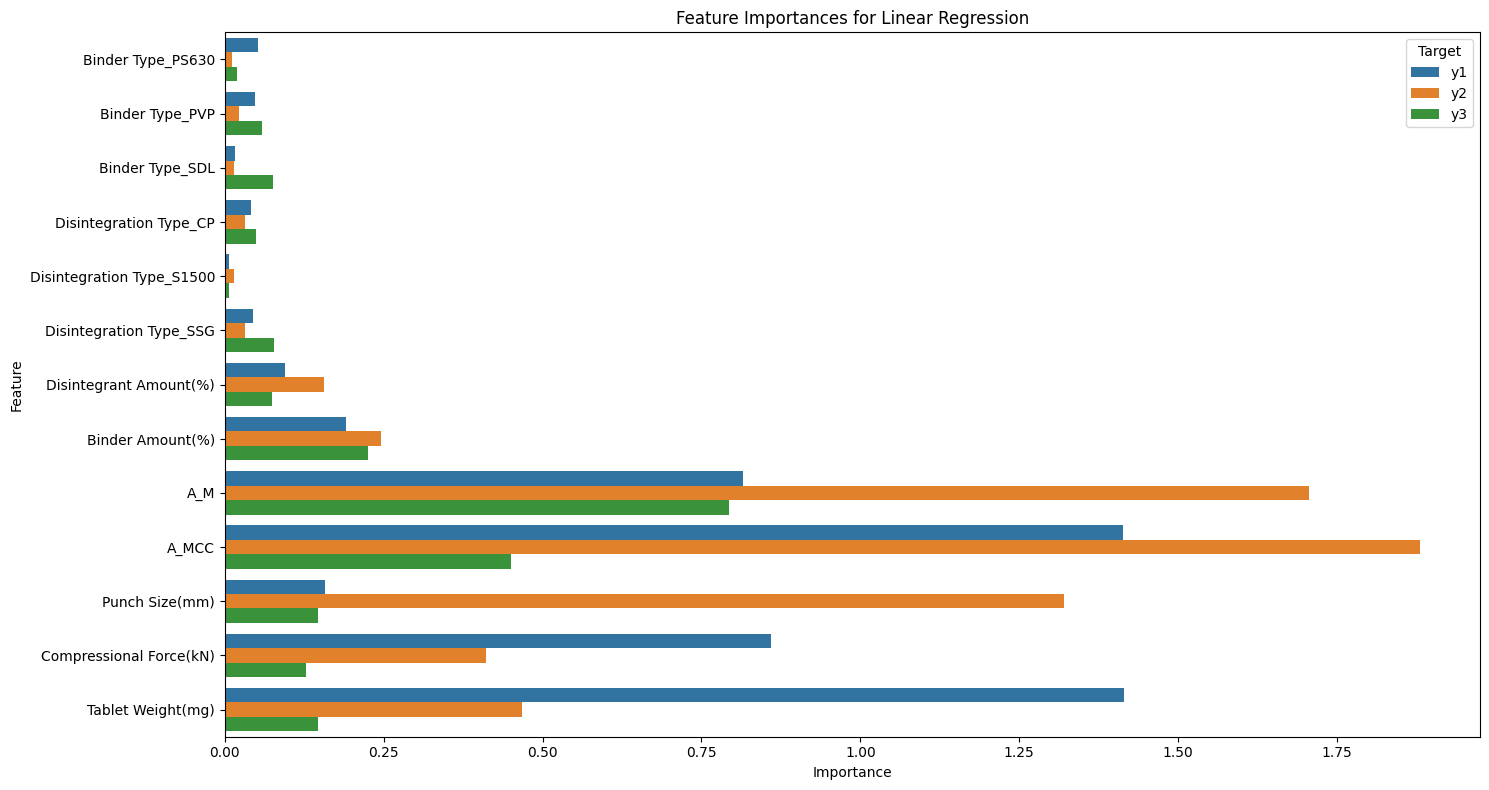

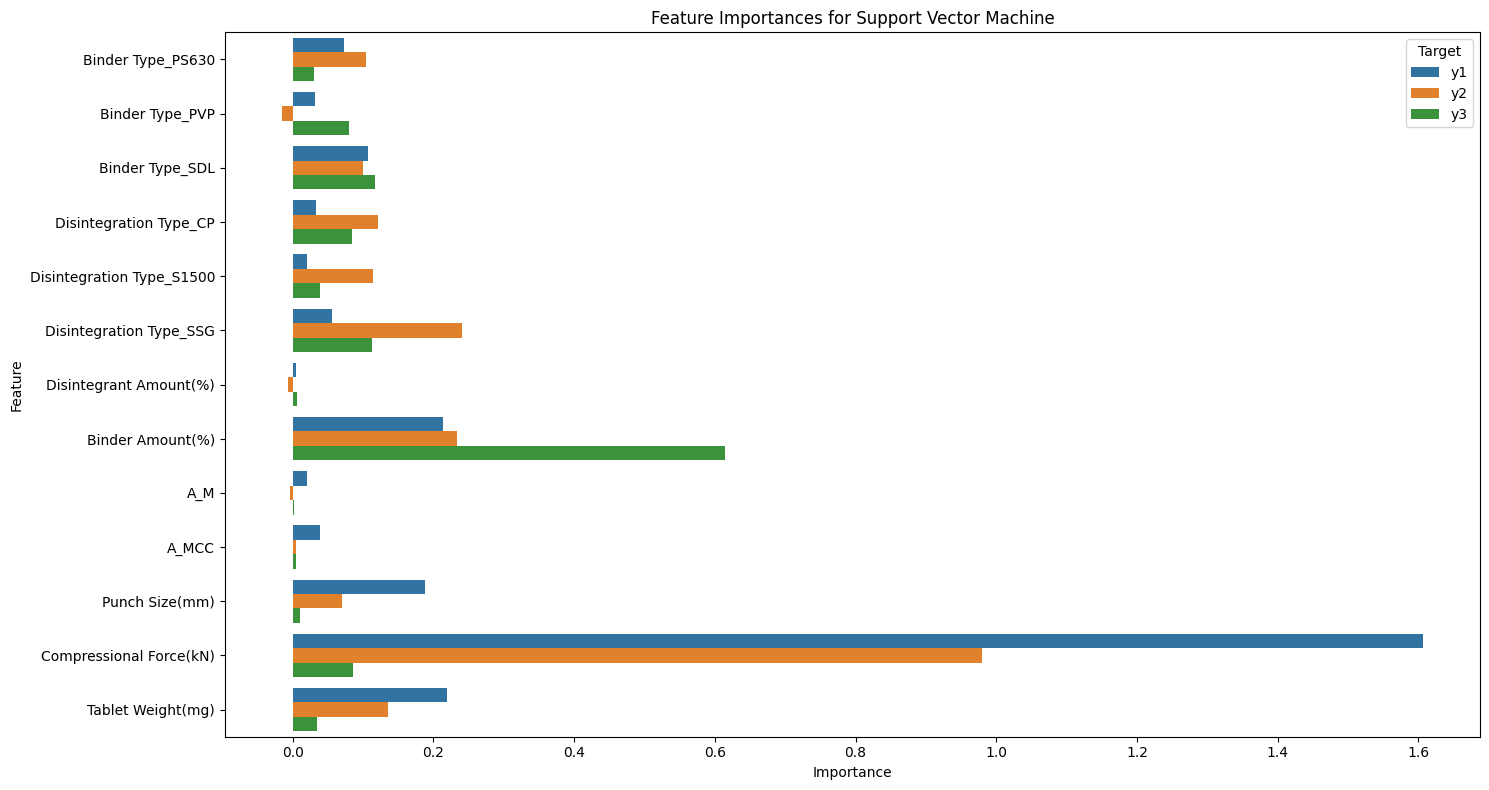

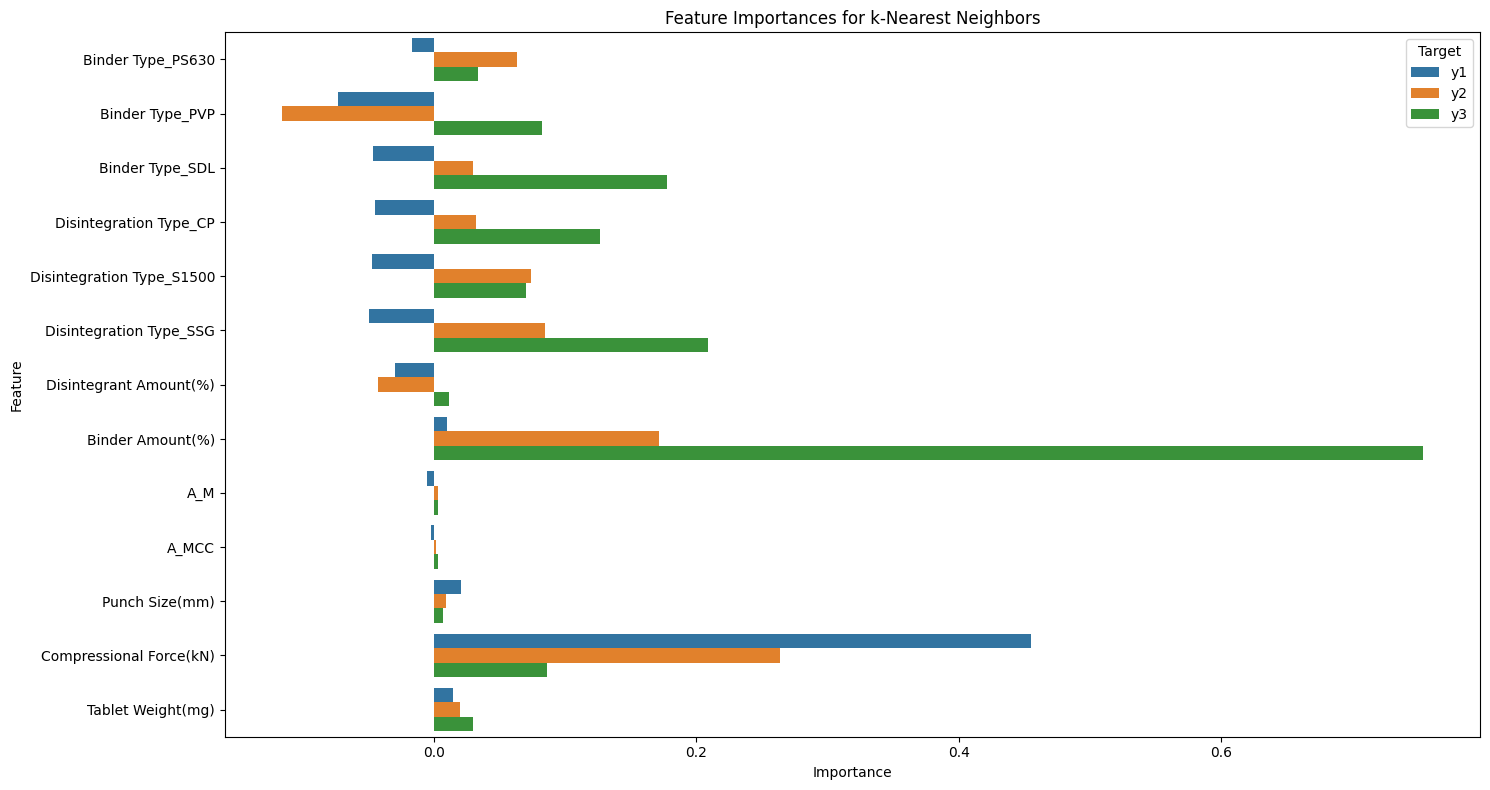

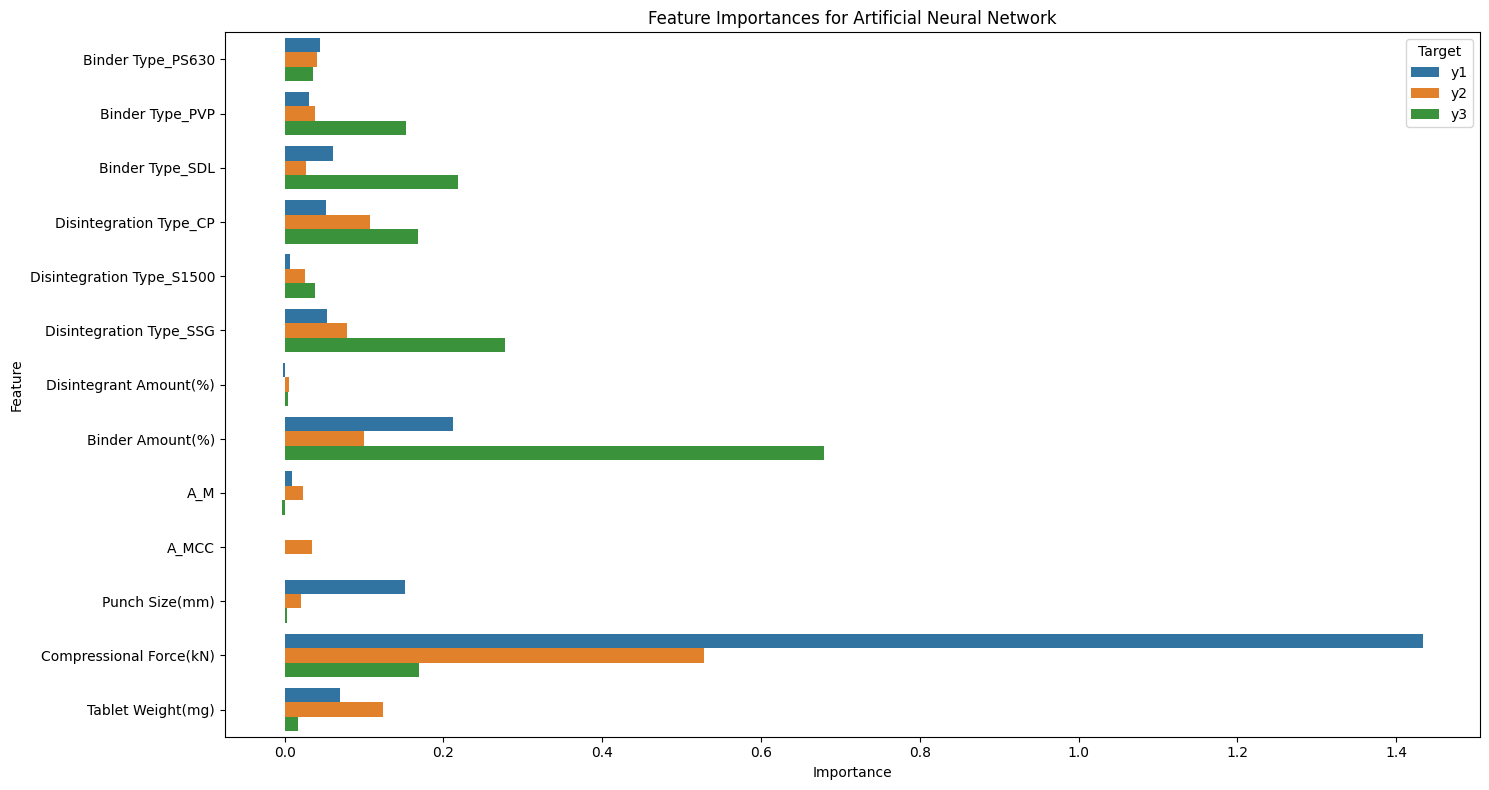

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance

# Function to calculate and visualize feature importances for all targets
def calculate_and_save_feature_importances(models, model_names, X_train, X_test, y_trains, y_tests, target_names):
    for model, model_name in zip(models, model_names):
        feature_importance_dfs = []

        for y_train, y_test, target_name in zip(y_trains, y_tests, target_names):
            model.fit(X_train, y_train.values.ravel())
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)

            # Calculate feature importances for Linear Regression model
            if isinstance(model, LinearRegression):
                feature_importances = np.abs(model.coef_).flatten()
            else:
                feature_importances = None

            if feature_importances is None:
                # Use permutation importance for models that don't provide feature importances
                perm_importance = permutation_importance(model, X_test, y_test.values.ravel(), n_repeats=10, random_state=42)
                feature_importances = perm_importance.importances_mean

            feature_names = X_train.columns
            feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances, 'Target': target_name})
            feature_importance_dfs.append(feature_importance_df)

        # Combine feature importance DataFrames for y1, y2, and y3
        combined_feature_importance_df = pd.concat(feature_importance_dfs)

        # Visualization of feature importances
        plt.figure(figsize=(15, 8))
        sns.barplot(x='Importance', y='Feature', hue='Target', data=combined_feature_importance_df)
        plt.title(f'Feature Importances for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.legend(title='Target')
        plt.tight_layout()
        plt.savefig(f'Combined_Feature_Importances_{model_name}.tiff', dpi=600, format='tiff')
        plt.show()

# Example datasets (replace with actual data loading and preprocessing)
# Assuming X_encoded, y1, y2, y3 are defined and preprocessed
# Split the data
X_train, X_test, y1_train, y1_test = train_test_split(X_encoded, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(X_encoded, y2, test_size=0.2, random_state=42)
_, _, y3_train, y3_test = train_test_split(X_encoded, y3, test_size=0.2, random_state=42)

# Models for y1, y2, and y3
models = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor(max_iter=500)
]

model_names = ['Linear Regression', 'Support Vector Machine', 'k-Nearest Neighbors', 'Artificial Neural Network']
target_names = ['y1', 'y2', 'y3']

# y_train and y_test lists
y_trains = [y1_train, y2_train, y3_train]
y_tests = [y1_test, y2_test, y3_test]

# Loop through all models and visualize combined feature importances for y1, y2, and y3
calculate_and_save_feature_importances(models, model_names, X_train, X_test, y_trains, y_tests, target_names)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import load_model
import joblib
import tensorflow as tf
from tensorflow.keras.utils import get_custom_objects

# Define the custom loss function
def r_squared_loss(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(y_true - y_pred))
    total = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    r2 = 1 - residual / (total + tf.keras.backend.epsilon())
    return r2

# Define the custom metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return (1 - SS_res/(SS_tot + tf.keras.backend.epsilon()))

# Register the custom loss and metric functions
get_custom_objects().update({'r_squared_loss': r_squared_loss, 'r_squared': r_squared})

# Load your data
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.'], axis=1)

# Separate features and target variables
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2]  # Binder Type and Disintegrant type
X2 = X.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10  # Disintegrant and binder amount
X3 = X.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100  # Mannitola and MCC amount
X4 = X.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20  # Punch Size
X5 = X.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10  # Compression Force
X6 = X.iloc[:, 8:9].apply(pd.to_numeric, errors='coerce') / 1000  # Tablet Weight

y1 = df.iloc[:, 9:10].apply(pd.to_numeric, errors='coerce') / 20  # Hardness(kg/cm2)
y2 = df.iloc[:, 10:11].apply(pd.to_numeric, errors='coerce') / 10  # % Friability
y3 = df.iloc[:, 11:12].apply(pd.to_numeric, errors='coerce') / 1000  # Disintegration Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse_output=False)
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2, X3, X4, X5, X6], axis=1)


# Save the fitted one-hot encoder for future use
joblib.dump(onehot_encoder, 'onehot_encoder.pkl')

# Load your pre-trained models
model_y1 = load_model('y1.hdf5', custom_objects={'r_squared_loss': r_squared_loss, 'r_squared': r_squared})
model_y2 = load_model('y2.hdf5', custom_objects={'r_squared_loss': r_squared_loss, 'r_squared': r_squared})
model_y3 = load_model('y3.hdf5', custom_objects={'r_squared_loss': r_squared_loss, 'r_squared': r_squared})

# Function to preprocess test data
def preprocess_test_data(test_df, encoder_path='onehot_encoder.pkl'):
    # Load the fitted encoder
    onehot_encoder = joblib.load(encoder_path)

    # Drop columns not present during training
    test_df = test_df.drop(['Batch No.'], axis=1, errors='ignore')

    # Ensure all necessary columns are present in the test data
    missing_cols = set(X.columns) - set(test_df.columns)
    for col in missing_cols:
        test_df[col] = 0

    # Preprocess the test data
    X_test = test_df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
    X1_test = X_test.iloc[:, 0:2]  # Binder Type and Disintegrant type
    X2_test = X_test.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10  # Disintegrant and binder amount
    X3_test = X_test.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100  # Mannitola and MCC amount
    X4_test = X_test.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20  # Punch Size
    X5_test = X_test.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10  # Compression Force
    X6_test = X_test.iloc[:, 8:9].apply(pd.to_numeric, errors='coerce') / 1000  # Tablet Weight

    # Perform one-hot encoding on X1_test
    X1_test_encoded = onehot_encoder.transform(X1_test)

    # Create a DataFrame with the encoded columns
    X1_test_encoded_df = pd.DataFrame(X1_test_encoded, columns=onehot_encoder.get_feature_names_out(X1_test.columns))

    # Concatenate the encoded columns with the remaining columns in X
    X_test_encoded = pd.concat([X1_test_encoded_df, X2_test, X3_test, X4_test, X5_test, X6_test], axis=1)

    return X_test_encoded

# Example test data
test_df = pd.read_csv('/content/Test.csv')

# Preprocess the test data
X_test_encoded = preprocess_test_data(test_df)

# Make predictions
y1_pred = model_y1.predict(X_test_encoded)
y2_pred = model_y2.predict(X_test_encoded)
y3_pred = model_y3.predict(X_test_encoded)

# Optionally, rescale the predictions back to their original scales
y1_pred_rescaled = y1_pred * 20
y2_pred_rescaled = y2_pred * 10
y3_pred_rescaled = y3_pred * 1000

print(y1_pred_rescaled, y2_pred_rescaled, y3_pred_rescaled)


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 74ms/step
[[0.       ]
 [0.       ]
 [2.3627913]
 [2.616861 ]
 [0.       ]
 [2.9833312]] [[1.7003165 ]
 [1.7075665 ]
 [0.9065243 ]
 [0.95522857]
 [0.8766255 ]
 [0.2537569 ]] [[ 67.606766]
 [ 96.60638 ]
 [182.40643 ]
 [163.23723 ]
 [158.13878 ]
 [163.89749 ]]


In [ ]:
print(X_test_encoded)
print(X_encoded)

   Binder Type_PS630  Binder Type_PVP  Binder Type_SDL  \
0                0.0              1.0              0.0   
1                1.0              0.0              0.0   
2                0.0              0.0              1.0   
3                0.0              1.0              0.0   
4                0.0              0.0              0.0   
5                0.0              0.0              1.0   

   Disintegration Type_CP  Disintegration Type_S1500  Disintegration Type_SSG  \
0                     0.0                        0.0                      1.0   
1                     0.0                        0.0                      0.0   
2                     1.0                        0.0                      0.0   
3                     0.0                        1.0                      0.0   
4                     0.0                        0.0                      0.0   
5                     0.0                        1.0                      0.0   

   Disintegrant Amount(%)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error


# Linear Regression for y1
linear_reg_y1 = LinearRegression()
linear_reg_y1.fit(X_encoded, y1)
y1_pred_linear = linear_reg_y1.predict(X_encoded)
linear_mse_y1 = mean_squared_error(y1, y1_pred_linear)

# Linear Regression for y2
linear_reg_y2 = LinearRegression()
linear_reg_y2.fit(X_encoded, y2)
y2_pred_linear = linear_reg_y2.predict(X_encoded)
linear_mse_y2 = mean_squared_error(y2, y2_pred_linear)

# Linear Regression for y3
linear_reg_y3 = LinearRegression()
linear_reg_y3.fit(X_encoded, y3)
y3_pred_linear = linear_reg_y3.predict(X_encoded)
linear_mse_y3 = mean_squared_error(y3, y3_pred_linear)

# Support Vector Machine (SVM) for y1
svm_y1 = SVR()
svm_y1.fit(X_encoded, y1)
y1_pred_svm = svm_y1.predict(X_encoded)
svm_mse_y1 = mean_squared_error(y1, y1_pred_svm)

# Support Vector Machine (SVM) for y2
svm_y2 = SVR()
svm_y2.fit(X_encoded, y2)
y2_pred_svm = svm_y2.predict(X_encoded)
svm_mse_y2 = mean_squared_error(y2, y2_pred_svm)

# Support Vector Machine (SVM) for y3
svm_y3 = SVR()
svm_y3.fit(X_encoded, y3)
y3_pred_svm = svm_y3.predict(X_encoded)
svm_mse_y3 = mean_squared_error(y3, y3_pred_svm)

# k-Nearest Neighbors (k-NN) for y1
knn_y1 = KNeighborsRegressor()
knn_y1.fit(X_encoded, y1)
y1_pred_knn = knn_y1.predict(X_encoded)
knn_mse_y1 = mean_squared_error(y1, y1_pred_knn)

# k-Nearest Neighbors (k-NN) for y2
knn_y2 = KNeighborsRegressor()
knn_y2.fit(X_encoded, y2)
y2_pred_knn = knn_y2.predict(X_encoded)
knn_mse_y2 = mean_squared_error(y2, y2_pred_knn)

# k-Nearest Neighbors (k-NN) for y3
knn_y3 = KNeighborsRegressor()
knn_y3.fit(X_encoded, y3)
y3_pred_knn = knn_y3.predict(X_encoded)
knn_mse_y3 = mean_squared_error(y3, y3_pred_knn)


y1_pred_ann = ann_y1.predict(X_encoded).ravel()
y2_pred_ann = ann_y2.predict(X_encoded).ravel()
y3_pred_ann = ann_y3.predict(X_encoded).ravel()


# Assuming you have already defined y1_test, y2_test, y3_test, y1_pred_linear, y2_pred_linear, y3_pred_linear,
# y1_pred_svm, y2_pred_svm, y3_pred_svm, y1_pred_knn, y2_pred_knn, y3_pred_knn, y1_pred_ann, y2_pred_ann, y3_pred_ann

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


27/27 [==============================] - 0s 10ms/step
Linear Regression MSE for y1: 0.009660652671248826
Linear Regression MSE for y2: 0.0060570818582464155
Linear Regression MSE for y3: 0.0019364267378029999
SVM MSE for y1: 0.006531319506482385
SVM MSE for y2: 0.004552713117429433
SVM MSE for y3: 0.0028544360022466045
k-NN MSE for y1: 0.01193578861111111
k-NN MSE for y2: 0.004304501898148148
k-NN MSE for y3: 0.0009485992129629632
ANN MSE for y1: 0.0014764617470441595
ANN MSE for y2: 0.0018113161722426302
ANN MSE for y3: 0.0008566233446183422
